In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Bước 1: Import Modules

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
#THAY ĐỔI ĐƯỜNG DẪN ĐẾN FILE MÀ MÌNH CHIA SẺ CHO MỌI NGƯỜI
WORKING_DIR="/content/drive/MyDrive/"

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/ĐỒ ÁN /DATA/FULL/full_TRAIN.csv")
eval_data = pd.read_csv("/content/drive/MyDrive/ĐỒ ÁN /DATA/FULL/full_DEV.csv")
test_data=pd.read_csv("/content/drive/MyDrive/ĐỒ ÁN /DATA/FULL/full_TEST.csv")

In [ ]:
eval_data['sentence_id'].replace(range(1094), range(7712,8806), inplace=True)

In [ ]:
test_data['sentence_id'].replace(range(2201), range(8806,11007), inplace=True)

# Bước 2: Load bộ dữ liệu NER

Sau khi đọc tập dữ liệu, chúng ta quan sát thử 50 dòng đầu tiên như thế nào.


#Visualizing
Thông kê bộ dữ liệu:
- Số lượng từ duy nhất trong kho ngữ liệu. (Tập từ vựng, số chiều)
- Số lượng thẻ duy nhất trong tập dữ liệu. (Tập nhãn)


Bằng cách sử dụng hàm **“nunique”.**

In [ ]:
data=pd.concat([train_data,eval_data,test_data])

In [ ]:
print("Unique words in corpus:", data['words'].nunique())
print("Unique tags in corpus:", data['labels'].nunique())

Unique words in corpus: 11322
Unique tags in corpus: 61


Tạo một danh sách và sử dụng phương thức set() để lấy các giá trị trong cột “word” và loại bỏ giá trị trùng.\
Thêm phần đệm có tên “Endpad”.


In [ ]:
#tạo tập từ vựng
words = list(set(data["words"].values))
words.append("ENDPAD")
num_words = len(words)

In [ ]:
#tạo tập nhãn tương tự như trên
tags = list(set(data["labels"].values))
tags.append("ENDPAD")
num_tags = len(tags)

# Bước 3: Lấy các câu và các thẻ tương ứng

In [ ]:
import pandas as pd
# Tạo mảng chứa nhiều mảng con
grouped = data.groupby('sentence_id')

output = []
for _, group in grouped:
    tuples = list(zip(group['words'], group['labels']))
    output.append(tuples)



# Bước 4: Ánh xạ giữa các câu và chỉ mục
Chúng ta có thể thấy rằng mỗi từ được gán cho một thẻ duy nhất. Chúng tôi có thể truy xuất những từ này bằng cách sử dụng các chỉ số của chúng và tra cứu chúng trong từ điển và trả về các khóa tương ứng.


In [ ]:
word2idx = {w: i   for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [ ]:
# word2idx
print(word2idx["ENDPAD"])
print(tag2idx)


11323
{'O': 0, 'I-SCREEN-NEGATIVE': 1, 'I-GENERAL-NEGATIVE': 2, 'B-BATTERY-NEUTRAL': 3, 'I-PRICE-NEGATIVE': 4, 'B-GENERAL-NEUTRAL': 5, 'B-DESIGN-NEUTRAL': 6, 'I-DESIGN-NEUTRAL': 7, 'B-STORAGE-NEUTRAL': 8, 'I-STORAGE-NEGATIVE': 9, 'I-FEATURES-NEUTRAL': 10, 'I-STORAGE-NEUTRAL': 11, 'I-PERFORMANCE-NEGATIVE': 12, 'I-BATTERY-NEGATIVE': 13, 'B-DESIGN-NEGATIVE': 14, 'B-PRICE-POSITIVE': 15, 'I-PRICE-POSITIVE': 16, 'B-BATTERY-NEGATIVE': 17, 'B-DESIGN-POSITIVE': 18, 'B-SCREEN-POSITIVE': 19, 'B-SER&ACC-NEUTRAL': 20, 'B-CAMERA-POSITIVE': 21, 'I-FEATURES-NEGATIVE': 22, 'B-FEATURES-NEUTRAL': 23, 'I-SER&ACC-NEGATIVE': 24, 'B-BATTERY-POSITIVE': 25, 'I-GENERAL-POSITIVE': 26, 'B-GENERAL-NEGATIVE': 27, 'I-SCREEN-NEUTRAL': 28, 'I-CAMERA-POSITIVE': 29, 'B-PERFORMANCE-POSITIVE': 30, 'B-GENERAL-POSITIVE': 31, 'B-SER&ACC-NEGATIVE': 32, 'I-DESIGN-POSITIVE': 33, 'B-STORAGE-NEGATIVE': 34, 'I-CAMERA-NEGATIVE': 35, 'I-BATTERY-POSITIVE': 36, 'I-CAMERA-NEUTRAL': 37, 'B-PERFORMANCE-NEGATIVE': 38, 'B-STORAGE-POSITIVE'

#Bước 5: Padding  đầu vào và cắt dữ liệu thành tập Train/Test\


In [ ]:
sentences=output

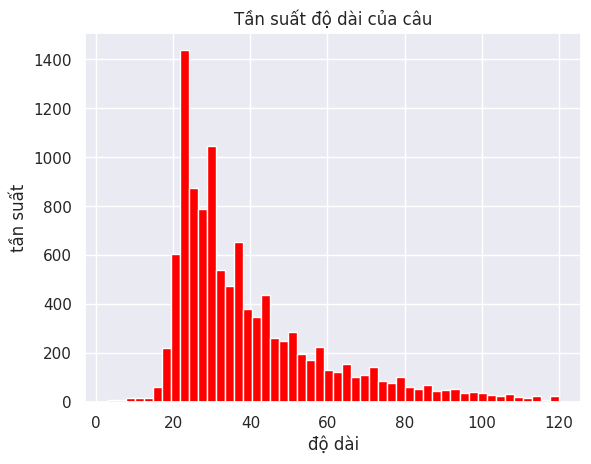

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setup style của matplotlib dưới dạng seaborn

sns.set()
plt.hist([len(s) for s in sentences], bins = 50, color="red")
# Khai báo tiêu đề cho trục x
plt.xlabel('độ dài')
# Khai báo tiêu đề cho trục y
plt.ylabel('tần suất')
# Title
plt.title('Tần suất độ dài của câu')
plt.show()

- Sử dụng hàm pad_sequence() cho padding
- X sẽ là một đại diện bằng số cho các từ. (sử dụng word2idx)
- ‘Post’ chỉ là một giá trị của đối số đệm ở cuối câu.
- X,y là vector

In [ ]:
#ánh xạ từ trong câu và nhãn về index của nó
from tensorflow.keras.preprocessing.sequence import pad_sequences
#đặt max length cho phù hợp
max_len = maxlen = max([len(s) for s in sentences])
print ('Maximum sequence length:', maxlen)

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)

#tương tự với nhãn
y = [[tag2idx[w[1]] for w in s] for s in sentences ]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=num_tags-1)



Maximum sequence length: 120


In [ ]:
from sklearn.model_selection import train_test_split
x_train=X[0:7712]
y_train=y[0:7712]
x_val=X[7712:8806]
y_val=y[7712:8806]
x_test=X[8806:]
y_test=y[8806:]

# Bước 6: Xây dựng Mô hình BiLSTM


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, Bidirectional
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Dropout, AveragePooling1D

Bản tóm tắt cho thấy rằng chúng ta có hơn 3,7 triệu tham số cần được huấn luyện.

In [ ]:
model = Sequential() #Yêu cầu khỏi tạo mạng BiLSTM
#Input
input = Input(shape=(120,))
#Embedding
model = Embedding(input_dim=num_words, output_dim=120, input_length=120)(input)
#BiLSTM
model = Bidirectional(LSTM(units=120, return_sequences=True, recurrent_dropout=0.1))(model)
#TimeDistributed
out = TimeDistributed(Dense(62, activation="softmax"))(model)  # softmax output layer
model = Model(input, out)

model.summary()



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 120, 120)          1358880   
                                                                 
 bidirectional_1 (Bidirectio  (None, 120, 240)         231360    
 nal)                                                            
                                                                 
 time_distributed_1 (TimeDis  (None, 120, 62)          14942     
 tributed)                                                       
                                                                 
Total params: 1,605,182
Trainable params: 1,605,182
Non-trainable params: 0
_________________________________________________________________


- Sử dụng trình tối ưu hoá "adam"
- sparce_categorical_crossentropy làm hàm mất mát
- Ma trận mà chúng ta sẽ quan tâm là ma trận độ chính xác.

In [ ]:
from tensorflow.keras.optimizers import Adam

learning_rate = 1e-4  # Giá trị learning rate mong muốn

optimizer = Adam(learning_rate=learning_rate)

model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

#Bước7: Huấn luyện Model

- Để bắt đầu huấn luyện là gọi model.fit ()
- Có thể tăng kích thước batch_size nếu bạn có GPU có kích thước bộ nhớ lớn.



In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import time
import os
start_time = time.time()
checkpoint_path = "/content/drive/MyDrive/cs338-lstm/lại/full"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_weights_only=True, mode='max')
history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test,y_test),
    #validation_spl,
    batch_size=64,
    epochs=10,
    verbose=1,
    callbacks=[checkpoint]
)
print("[{}] Completed!".format(time.time() - start_time))

Epoch 1/10
121/121 [==============================] - 139s 1s/step - loss: 2.4739 - accuracy: 0.6533 - val_loss: 1.1990 - val_accuracy: 0.7226
Epoch 2/10
121/121 [==============================] - 119s 984ms/step - loss: 1.0881 - accuracy: 0.7686 - val_loss: 1.0132 - val_accuracy: 0.7614
Epoch 3/10
121/121 [==============================] - 115s 943ms/step - loss: 0.9886 - accuracy: 0.7701 - val_loss: 0.9644 - val_accuracy: 0.7673
Epoch 4/10
121/121 [==============================] - 114s 944ms/step - loss: 0.9573 - accuracy: 0.7730 - val_loss: 0.9423 - val_accuracy: 0.7719
Epoch 5/10
121/121 [==============================] - 112s 928ms/step - loss: 0.9392 - accuracy: 0.7759 - val_loss: 0.9275 - val_accuracy: 0.7751
Epoch 6/10
121/121 [==============================] - 110s 909ms/step - loss: 0.9254 - accuracy: 0.7780 - val_loss: 0.9159 - val_accuracy: 0.7766
Epoch 7/10
121/121 [==============================] - 111s 921ms/step - loss: 0.9130 - accuracy: 0.7792 - val_loss: 0.9049 - va

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']


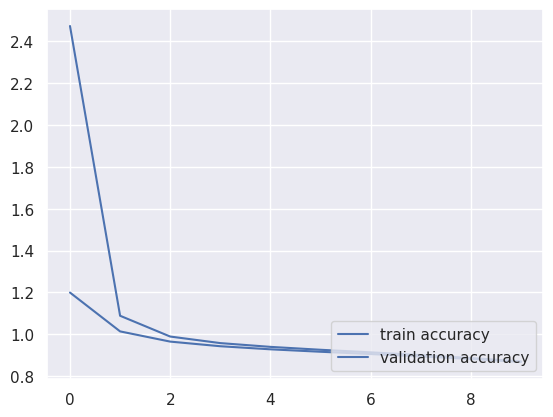

In [ ]:
plt.plot(history.history['loss'],c='b',label='train accuracy')
plt.plot(history.history['val_loss'],label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

# Bước8: Đánh giá mô hình NER



In [ ]:
model.evaluate(x_test, y_test)

69/69 [==============================] - 6s 85ms/step - loss: 0.8668 - accuracy: 0.7811


[0.866828978061676, 0.781144917011261]

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

69/69 [==============================] - 5s 65ms/step


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test.reshape(-1), y_pred.reshape(-1), average = 'micro')

0.7811449341208542

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test.reshape(-1), y_pred.reshape(-1), average = 'macro')

0.02477985473923776

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test.reshape(-1), y_pred.reshape(-1),digits=6))

              precision    recall  f1-score   support

           0   0.352000  0.979178  0.517843     30929
           1   0.000000  0.000000  0.000000       864
           2   0.000000  0.000000  0.000000      1502
           3   0.000000  0.000000  0.000000        69
           4   0.000000  0.000000  0.000000       458
           5   0.000000  0.000000  0.000000        63
           6   0.000000  0.000000  0.000000        15
           7   0.000000  0.000000  0.000000       150
           8   0.000000  0.000000  0.000000         7
           9   0.000000  0.000000  0.000000       128
          10   0.000000  0.000000  0.000000       323
          11   0.000000  0.000000  0.000000        18
          12   0.000000  0.000000  0.000000      5803
          13   0.000000  0.000000  0.000000      4039
          14   0.000000  0.000000  0.000000        95
          15   0.000000  0.000000  0.000000       122
          16   0.000000  0.000000  0.000000       546
          17   0.000000  0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Dự đoán

In [ ]:
# i = np.random.randint(0, x_test.shape[0]) #659
print(x_test[2000])
i =30
p = model.predict(np.array([x_test[i]]))

p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(x_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w], tags[true], tags[pred]))
    #print(w)

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Câu đầu vào
sentence = "sp ổn, tốt, mẫu mã đẹp, nói chung hài lòng"
# Xử lý câu

# Chuyển đổi câu thành sequence sử dụng tokenizer
input_sequence = []
for word in sentence.split():
    if word in words:
        input_sequence.append(words.index(word))
    else:
        input_sequence.append(0)

input_sequence = [input_sequence]

# Độ dài tối đa đã được huấn luyện
max_len = 120

# Padding sequence
padded_sequence = pad_sequences(input_sequence, maxlen=max_len)
print(padded_sequence)
# Dự đoán trên mô hình
p = model.predict(padded_sequence)

# Xem kết quả dự đoán
p = np.argmax(p, axis=-1)
print("{:15}\t {}\n".format("Word", "Pred"))
print("-" *30)
for w, pred in zip(input_sequence[0], p[0]):
    print("{:15}\t{}".format(words[w], tags[pred]))
    print(w)

In [ ]:
pip install nltk

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer()

# Dữ liệu mới cần phân loại
new_texts = "Hàng đẹp giao hàng siêu nhanh. Mua lần 2 mới đc. Lần đầu thì hết hàng."
data=word_tokenize(new_texts)
new_data=[0]*120
for i in range(len(data)):
  if data[i] in words:
    new_data[i]=words.index(data[i])
  else:
    new_data[i]=0
for i in range(len(data),len(new_data)):
  new_data[i]=11323
new_data_test=np.array([new_data])


# Dự đoán lớp của dữ liệu mới
p = model.predict(new_data_test)
p = np.argmax(p, axis=-1)

print("{:15}\t {}\n".format("Word", "Pred"))
x=[x for x in range(0,len(data))]
print(x)
print("-" *30)
for w,  pred in zip(x, p[0]):
    print("{}\t{}".format(data[w], tags[pred]))
    print(w)

1/1 [==============================] - 0s 157ms/step
Word           	 Pred

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
------------------------------
Hàng	B-SER&ACC
0
đẹp	I-DESIGN
1
giao	I-SER&ACC
2
hàng	I-SER&ACC
3
siêu	I-SER&ACC
4
nhanh	I-SER&ACC
5
.	I-SER&ACC
6
Mua	O
7
lần	I-SER&ACC
8
2	O
9
mới	O
10
đc	O
11
.	O
12
Lần	O
13
đầu	O
14
thì	O
15
hết	O
16
hàng	I-SER&ACC
17
.	O
18
